# Загружаю библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Выгружаю данные

In [3]:
flights = pd.read_csv(r"D:/asuka/zuev/flights.csv")
airports = pd.read_csv(r"D:/asuka/zuev/airports.csv")
airlines = pd.read_csv(r"D:/asuka/zuev/airlines.csv")
l_airport_id = pd.read_csv(r"D:/asuka/zuev/L_AIRPORT_ID.csv")
l_airport = pd.read_csv(r"D:/asuka/zuev/L_AIRPORT.csv")

C:\Users\galts\AppData\Local\Temp\ipykernel_13296\672183570.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv(r"D:/asuka/zuev/flights.csv")


In [4]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flights.columns = flights.columns.str.lower()
airports.columns = airports.columns.str.lower()
airlines.columns = airlines.columns.str.lower()
l_airport_id.columns = l_airport_id.columns.str.lower()
l_airport.columns = l_airport.columns.str.lower()

# 1.Бизнес – анализ данных

## 1.1

In [6]:
flights

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
number_flights_per_month = flights.day.groupby(flights.month).count()
number_flights_per_month = number_flights_per_month.reset_index()
number_flights_per_month.rename(columns={'day': 'flights'}, inplace=True)
number_flights_per_month.replace({1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'August', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December' }, inplace = True)
number_flights_per_month

,month,flights
0,January,469968
1,February,429191
2,March,504312
3,April,485151
4,May,496993
5,June,503897
6,July,520718
7,August,510536
8,September,464946
9,October,486165


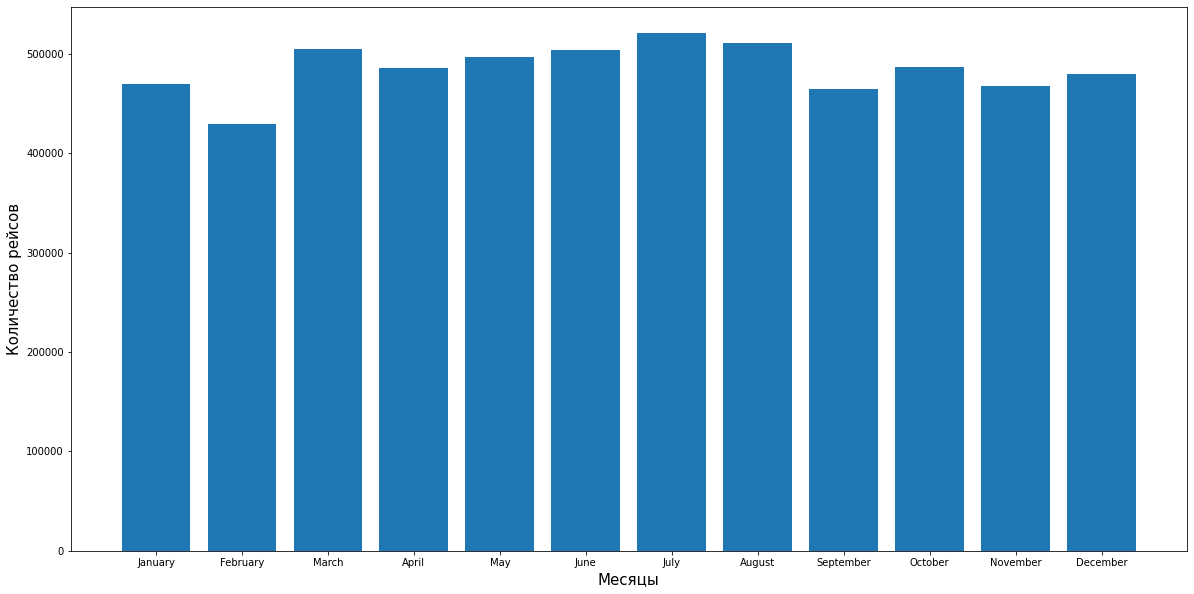

In [8]:
x = number_flights_per_month.month
y = number_flights_per_month.flights

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_xlabel('Месяцы',fontsize = 15)
ax.set_ylabel('Количество рейсов',fontsize = 15)

fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(10)    #  высота Figure

plt.show()

Пик перелетов приходится на 7 месяц, а спад наблюдается на 2 месяц.

## 1.2

In [10]:
flights_day_of_the_week = flights.day.groupby(flights.day_of_week).count()
flights_day_of_the_week = flights_day_of_the_week.reset_index()
flights_day_of_the_week.rename(columns={'day': 'flights'}, inplace=True)
flights_day_of_the_week.replace({1 : 'Понедельник', 2 : 'Вторник', 3 : 'Среда', 4 : 'Четверг', 5 : 'Пятница', 6 : 'Суббота', 7 : 'Воскресенье' }, inplace = True)
flights_day_of_the_week

,day_of_week,flights
0,Понедельник,865543
1,Вторник,844600
2,Среда,855897
3,Четверг,872521
4,Пятница,862209
5,Суббота,700545
6,Воскресенье,817764


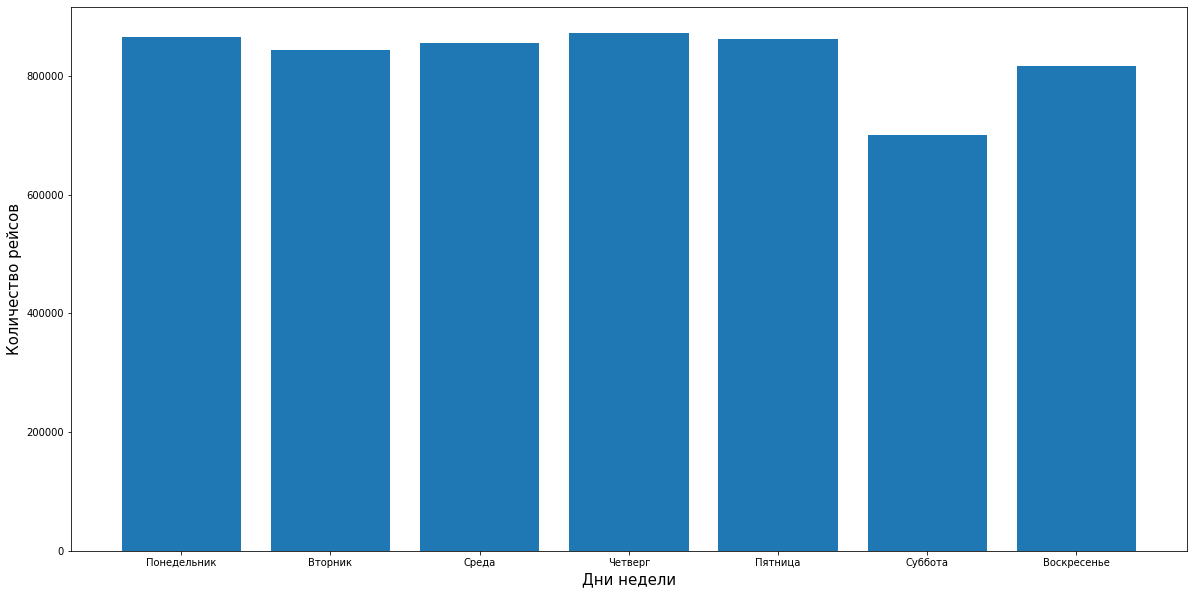

In [11]:
x = flights_day_of_the_week.day_of_week
y = flights_day_of_the_week.flights

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_xlabel('Дни недели',fontsize = 15)
ax.set_ylabel('Количество рейсов',fontsize = 15)

fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(10)    #  высота Figure

plt.show()

Количество рейсов по дням недели распределены в основном на рабочие дни с пн-пт, на выходных наблюдается уменьшение количества рейсов.

## 1.3

In [12]:
from_city = flights.origin_airport.value_counts()
to_city = flights.destination_airport.value_counts()
summa_flights = from_city.append(to_city)
summa_flights

C:\Users\galts\AppData\Local\Temp\ipykernel_13296\53875509.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summa_flights = from_city.append(to_city)


ATL      346836
ORD      285884
DFW      239551
DEN      196055
LAX      194673
          ...  
13964         1
14025         1
15497         1
12265         1
10666         1
Length: 1860, dtype: int64

In [13]:
group_sum = summa_flights.groupby(summa_flights.index).sum()
airports_group = pd.DataFrame(group_sum.sort_values(ascending = False), columns = ['flights'])
airports_group

,flights
ATL,693740
ORD,571790
DFW,479133
DEN,392065
LAX,389369
...,...
13964,2
14222,2
12265,2
10666,1


In [14]:
group_city = airports.set_index('iata_code').join(airports_group,rsuffix = ['flights'])
group_city

,airport,city,state,country,latitude,longitude,flights
iata_code,,,,,,,
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,4550
ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,4656
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,38380
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,1342
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,1752
...,...,...,...,...,...,...,...
WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982,1328
WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764,416
XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681,18567


In [15]:
top10_city = group_city.flights.groupby(group_city.city).sum().sort_values(ascending = False).head(10)
top10_city = top10_city.reset_index()
top10_city

,city,flights
0,Chicago,733560
1,Atlanta,693740
2,Dallas-Fort Worth,479133
3,Houston,397388
4,Denver,392065
5,Los Angeles,389369
6,New York,386806
7,San Francisco,295974
8,Phoenix,293627
9,Las Vegas,266379


Топ 10 городов по количеству рейсов

## 1.4

In [16]:
count_flights = flights.day.groupby(flights.airline).count()
count_flights

airline
AA     725984
AS     172521
B6     267048
DL     875881
EV     571977
F9      90836
HA      76272
MQ     294632
NK     117379
OO     588353
UA     515723
US     198715
VX      61903
WN    1261855
Name: day, dtype: int64

In [17]:
top10_airline = airlines.set_index("iata_code").join(count_flights)
top10_airline.day.groupby(top10_airline.airline).sum().sort_values(ascending = False).head(10)

airline
Southwest Airlines Co.          1261855
Delta Air Lines Inc.             875881
American Airlines Inc.           725984
Skywest Airlines Inc.            588353
Atlantic Southeast Airlines      571977
United Air Lines Inc.            515723
American Eagle Airlines Inc.     294632
JetBlue Airways                  267048
US Airways Inc.                  198715
Alaska Airlines Inc.             172521
Name: day, dtype: int64

Топ 10 авиакомпаний по количеству рейсов

# 2.Исследование данных

## 2.1

In [18]:
flights.departure_delay.min()

-82.0

In [19]:
min_departure_delay = flights.query('departure_delay == -82.0')
min_departure_delay

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
5645762,2015,12,20,7,AS,161,N793AS,ADK,ANC,1715,...,1940.0,-80.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
airports.query(" iata_code == 'ADK' ")

,iata_code,airport,city,state,country,latitude,longitude
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


Аэропорт с минимальной задержкой вылета Adak Airport.

## 2.2

Мой аэропорт по списку группы:

In [30]:
airports.iata_code.iloc()[201]

'MHK'

In [31]:
airports.query("iata_code == 'MHK' ")

,iata_code,airport,city,state,country,latitude,longitude
201,MHK,Manhattan Regional Airport,Manhattan,KS,USA,39.14097,-96.67083


In [32]:
airlines_delay= flights[(flights.arrival_delay == 0) & (flights.destination_airport.isin(['MHK']))]
airlines_delay.airline.value_counts()

MQ    27
EV     3
Name: airline, dtype: int64

In [33]:
airlines_delay = flights[flights.destination_airport.isin(['MHK'])]
airlines_delay = pd.DataFrame(airlines_delay.arrival_delay.groupby(airlines_delay.airline).mean().sort_values(ascending = True).head(10))
airlines_delay = airlines_delay.reset_index()
airlines_delay.rename(columns={'arrival_delay': 'arrival_delay_mean'}, inplace=True)
airlines_delay

,airline,arrival_delay_mean
0,MQ,4.381649
1,EV,13.923077


In [34]:
airlines.query("iata_code == 'MQ' ")

,iata_code,airline
12,MQ,American Eagle Airlines Inc.


Самая пунктуальная авиакомпания на прилет - American Eagle Airlines Inc.

## 2.3

In [35]:
airport_taxing_out = flights.taxi_out.groupby(flights.origin_airport).mean()
airport_taxing_in = flights.taxi_in.groupby(flights.destination_airport).mean()
airport_taxing = airport_taxing_out.append(airport_taxing_in)
airport_taxing = airport_taxing.groupby(airport_taxing.index).mean()
airport_taxing.nlargest(12).iloc()[2 : ]

C:\Users\galts\AppData\Local\Temp\ipykernel_13296\3866383097.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airport_taxing = airport_taxing_out.append(airport_taxing_in)


JFK      17.876018
LGA      17.810657
12953    17.176806
ORD      16.378863
12266    16.332672
12478    16.284931
13930    16.200937
13930    15.688966
11298    15.531195
12478    15.375000
dtype: float64

In [79]:
airports.query("iata_code == 'JFK' ")

,iata_code,airport,city,state,country,latitude,longitude
166,JFK,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893


JFK аэропорт, в котором самолеты проводят в среднем больше всего времени на рулении.